https://www.kaggle.com/c/transfer-learning-on-stack-exchange-tags/data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import re

In [23]:
biology_df = pd.read_csv('data/biology.csv')
robotic_df = pd.read_csv('data/robotics.csv')
cooking_df = pd.read_csv('data/cooking.csv')
crypto_df =pd.read_csv('data/crypto.csv')
travel_df =pd.read_csv('data/travel.csv')
diy_df =pd.read_csv('data/diy.csv')

In [24]:
biology_df.set_index('id',inplace=True)
robotic_df.set_index('id', inplace=True)
cooking_df.set_index('id',inplace=True)
crypto_df.set_index('id',inplace=True)
travel_df.set_index('id',inplace=True)
diy_df.set_index('id',inplace=True)

In [25]:
biology_df['topic'] = 'biology'
robotic_df['topic'] = 'robotic'
cooking_df['topic'] = 'cooking'
crypto_df['topic'] = 'crypto'
travel_df['topic'] ='travel'
diy_df['topic'] = 'diy'

In [26]:
#print(biology_df.shape, robotic_df.shape, cooking_df.shape, crypto_df.shape, travel_df.shape, diy_df.shape)

In [27]:
stacke_df = pd.DataFrame()

In [28]:
stacke_df = stacke_df.append(biology_df)

In [29]:
stacke_df = stacke_df.append(robotic_df)


In [30]:
stacke_df = stacke_df.append(cooking_df)
stacke_df = stacke_df.append(crypto_df)
stacke_df = stacke_df.append(travel_df)
stacke_df = stacke_df.append(diy_df)
stacke_df.reset_index(drop= True, inplace=True)

In [31]:
stacke_df.shape

(87000, 4)

In [10]:
stacke_df.sample(10)

,title,content,tags,topic
8287,What is the fate of micronucleus DNA?,<p>Micronuclei are cellular structures that ar...,cell-biology dna,biology
64370,How do I wire a switch/receptacle combination?,<p>Here's my current situation. I've got 14/2...,wiring switch receptacle,diy
63690,Moving my washer and dryer will mean I'll need...,<p>I live in a two-story condo/townhouse. My ...,vent dryer ducts,diy
50163,Sheremetyevo (SVO) Airport transit zone temper...,<p>On next days I will stop in Sheremetyevo SV...,airports weather-and-climate clothing svo,travel
16341,Caffeine content of cold-brewed coffee: higher...,<p>I recently rediscovered the joys of cold-br...,coffee cold-brew caffeine,cooking
38344,How does the HOTP dynamic truncation function ...,"<p>HOTP, the HMAC-based One-Time Password algo...",hmac reference-request sha-256 sha-512 hotp,crypto
42422,How to find an appropriate frequent flyer prog...,<p>In the last months I flew a lot with differ...,air-travel airlines loyalty-programs swiss aer...,travel
46244,Am I eligible for ESTA US visa?,<p>I am travelling to New York in September. T...,usa us-visa-waiver-program,travel
47858,"Lesovo, Bulgaria to Hamzabeyli, Turkey with bike",<p>It's hard to find online information about ...,borders turkey bicycles bulgaria,travel
60798,Air China/Star Alliance baggage drop at Heathrow?,<p>Are there bag dropping facilities available...,luggage lhr star-alliance air-china,travel


In [11]:
import re

In [12]:
from spacy.en import STOP_WORDS
from spacy.en import English
nlp = English()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
biology_df.iloc[17,1]

"<p>I know the basics of epigenetics, but I do not know how epigenetic mechanisms are transmitted from parents to children (or if there is even enough literature to derive a consensus). My question is relates to surrogate motherhood, in which an egg is fertilized <em>in vitro</em> and then implanted in the womb of a woman other than the egg donor. </p>\n\n<p>Are all the factors that affect epigenetic mechanisms encoded in the genome? Is it possible for the surrogate mother's epigenetics to influence the epigenetics of the child/children?</p>\n"

In [14]:
from bs4 import BeautifulSoup

In [15]:
def bs(text):
    text = BeautifulSoup(text, 'html.parser')
    return text.get_text()

In [16]:
stacke_df['content'] = stacke_df['content'].apply(bs)

In [393]:
# def cleaner(text):
#     text = re.sub('&#39;','',text).lower() #convert everything to lower case
#     text = re.sub('[\n]',' ',text) # remove '\n' character
#     text = re.sub('\\ufeff', '', text) #for unicode characters
#     text = re.sub('[^a-z ]','', text)
#     text = ' '.join(i.lemma_ for i in nlp(text)
#                     if i.lemma_ not in STOP_WORDS and i.lemma_ not in punctuation and i.lemma_ != '-PRON-')
#     text = ' '.join(text.split())
#     return text

In [351]:
#crypto_df.iloc[5378,1]

In [352]:
#bs(crypto_df.iloc[5378,1])

In [372]:
import re
import string
punctuation = string.punctuation
def clean(text):
    #convert everything to lowercase
    text = re.sub('&#39;','',text).lower()
    #replace '\n' with space
    text = re.sub('[\n]', ' ', text)
    #for unicode characters
    text = re.sub('\\ufeff', '', text)
    # nything starting with other than a-z, like number, replace with empty spaces
    text = re.sub('[^a-z]', ' ', text)
    #removing multiple spaces from sentence
    text = " ".join(text.split()) 
    text = nlp(text)
    #removing pronounces from sentences
    text = [tok.lemma_ for tok in text if tok.lemma_ != '-PRON-'] 
    #removing "'s" from sentences
    text = [tok for tok in text if tok not in STOP_WORDS and tok not in punctuation and tok not in ["\'s"]]
    #removing single letter from sentences
    text = " ".join(t for t in text if len(t)>1) 
    return text

In [373]:
bs(biology_df.iloc[17,1])
clean(bs(crypto_df.iloc[5378,1]))

'currently hear lecture cryptography professor definition semantic security roughly follow formally complete idea function info determine information attacker interested info mean attacker want know plaintext message polynomial time attacker posession cipher text possible construct simulator knowledge cipher text equal chance determine info read stackexchance like definition semantic security use indistinguishability ind lecture interested ind semantic security outline proceed talk time pad otp fulfill requirement offer beginning proof basic idea proof like attacker construct simulator follow way pick random binary string leftarrow return result mean chance succeed high chance sense mean work know otp secure chance succeed info chance pick correct binary string try proove security argue way soon longer use knowledge proof longer work eye try come proof semantic security time pad fail far try find exist proof internet fail idea proove indistinguishability far know ind semantic security 

In [354]:
# text = bs(crypto_df.iloc[17,1])
# text = re.sub('&#39;','',text).lower()
# text = re.sub('[\n]', ' ', text)
# text = re.sub('[^a-z]', ' ', text)
# text = " ".join(text.split())
# text = nlp(text)
# text = [tok.lemma_ for tok in text if tok.lemma_ !='-PRON-']
# text = [tok for tok in text if tok not in STOP_WORDS and tok not in punctuation and tok not in ["\'s"]]
# text = " ".join(t for t in text if len(t)>1)
# text

In [374]:
stacke_df['content'] = stacke_df['content'].apply(clean)

In [375]:
stacke_df['content'][48360]

'friend panamanian citizen live work recently lose passport visa currently photo panamanian driver license new passport panama return country trip panamanian consulate yield definite answer topic cause considerable stress guy advice lead appreciate'

In [376]:
stacke_df['title'] = stacke_df['title'].apply(clean)

In [377]:
stacke_df.to_pickle('data/stack_cleaned_df.p')

In [3]:
stack_cleaned_df = pd.read_pickle('data/stack_cleaned_df.p')

In [4]:
stack_cleaned_df.iloc[17000,1]

'noodle soup recipe boiling drain noodle separately add broth cook reason add dry noodle minute soup add little extra water broth compensate noodle way allow noodle broth flavor save dirty extra pot colander'

## EDA

In [6]:
from wordcloud import WordCloud

#### Creating wordcloud for 'biology' topic

In [394]:
tags = np.array(biology_df['tags'])

In [395]:
text = ''
for tag in tags:
    text = " ".join([text, tag])
text = text.strip()

In [396]:
len(text)

396201

In [397]:
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=80).generate(text)

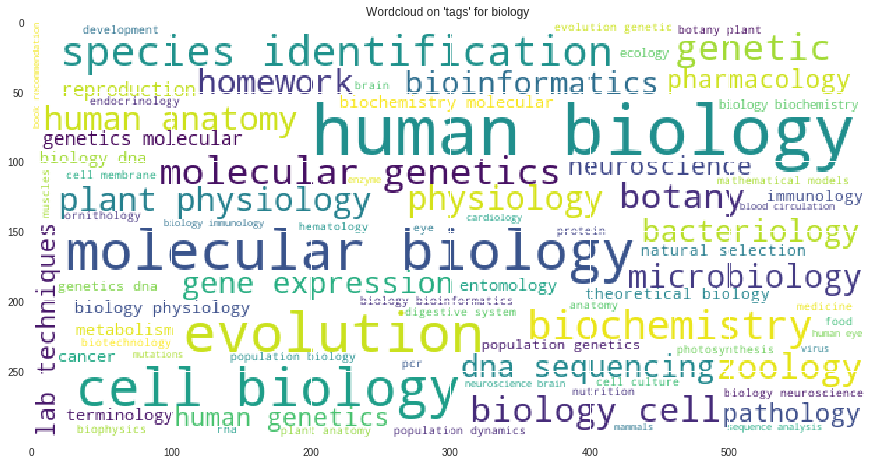

In [398]:
fig = plt.figure(figsize=(15,20))
plt.imshow(wordcloud)
plt.title("Wordcloud on 'tags' for biology ")
plt.show()

In [54]:
tags_robo = np.array(robotic_df['tags'])
text= ''
for tag in tags_robo:
    text = " ".join([text, tag])
    

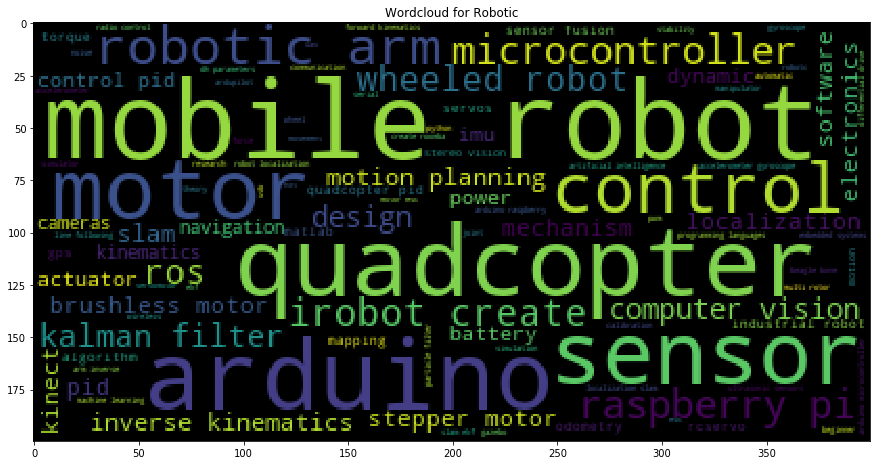

In [57]:
wordcloud_robo = WordCloud(background_color='black', max_words=100).generate(text)
fig = plt.figure(figsize=(15,20))
plt.imshow(wordcloud_robo)
plt.title('Wordcloud for Robotic')
plt.show()

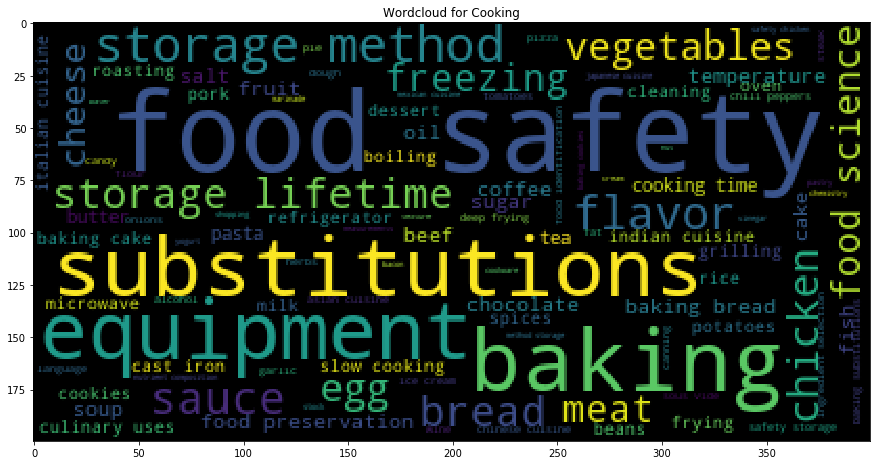

In [59]:
tags_cook = np.array(cooking_df['tags'])
text= ''
for tag in tags_cook:
    text = " ".join([text, tag])
    
wordcloud_cook = WordCloud(background_color='black', max_words=100).generate(text)
fig = plt.figure(figsize=(15,20))
plt.imshow(wordcloud_cook)
plt.title('Wordcloud for Cooking')
plt.show()

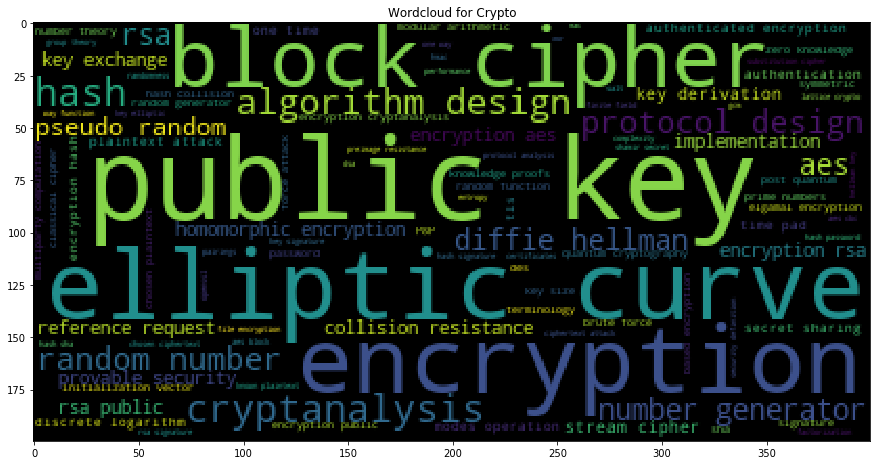

In [61]:
tags_crypto = np.array(crypto_df['tags'])
text= ''
for tag in tags_crypto:
    text = " ".join([text, tag])
    
wordcloud_crypto = WordCloud(background_color='black', max_words=100).generate(text)
fig = plt.figure(figsize=(15,20))
plt.imshow(wordcloud_crypto)
plt.title('Wordcloud for Crypto')
plt.show()

In [26]:
import spacy
nlp = spacy.load('en')

In [96]:
import string
punctuation = string.punctuation

In [94]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [382]:
from collections import Counter
import seaborn as sns

In [383]:
bio_content = (stack_cleaned_df[stack_cleaned_df['topic']=='biology']['content'])
bio_clean = ' '.join([i for i in bio_content]).split()

In [384]:
bio_counter = Counter(bio_clean)
bio_word = [word[0] for word in bio_counter.most_common(25)]
bio_count = [word[1] for word in bio_counter.most_common(25)]

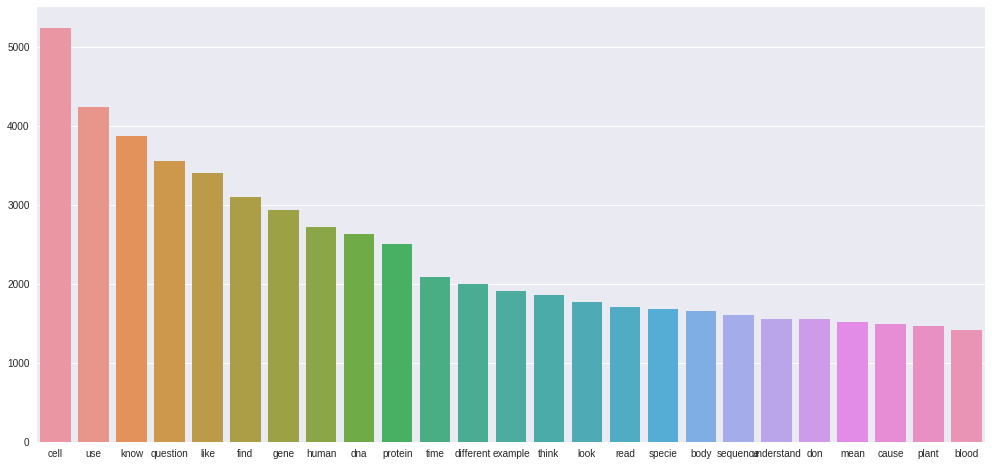

In [385]:
fig = plt.figure(figsize=(17,8))
sns.barplot(x=bio_word, y=bio_count,)

In [386]:
robo_content = stack_cleaned_df[stack_cleaned_df['topic']=='robotic']['content']
robo_clean = " ".join([i for i in robo_content]).split()
robo_clean = Counter(robo_clean)
robo_word = [word[0] for word in robo_clean.most_common(25)]
robo_count = [word[1] for word in robo_clean.most_common(25)]

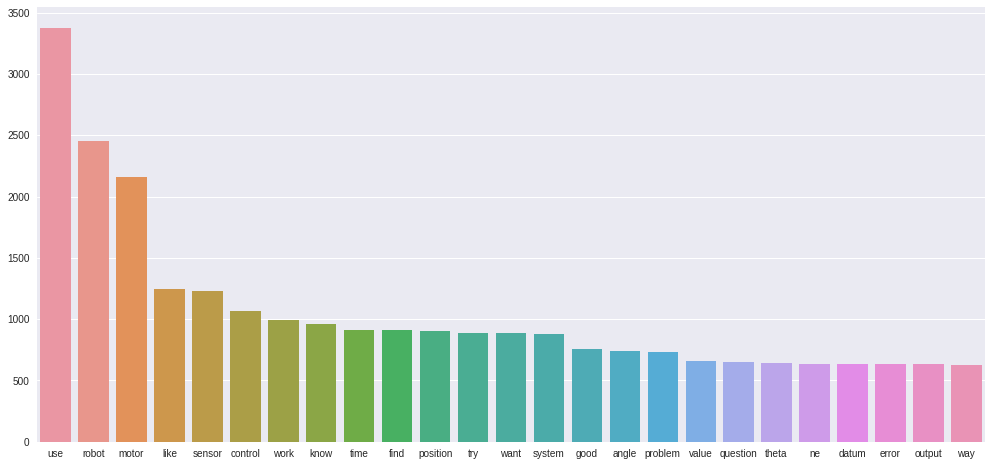

In [387]:
fig = plt.figure(figsize=(17,8))
sns.barplot(x=robo_word, y=robo_count)

In [388]:
cook_content = stack_cleaned_df[stack_cleaned_df['topic']=='cooking']['content']
cook_clean = " ".join([i for i in cook_content]).split()
cook_clean = Counter(cook_clean)
cook_word = [word[0] for word in cook_clean.most_common(25)]
cook_count = [word[1] for word in cook_clean.most_common(25)]

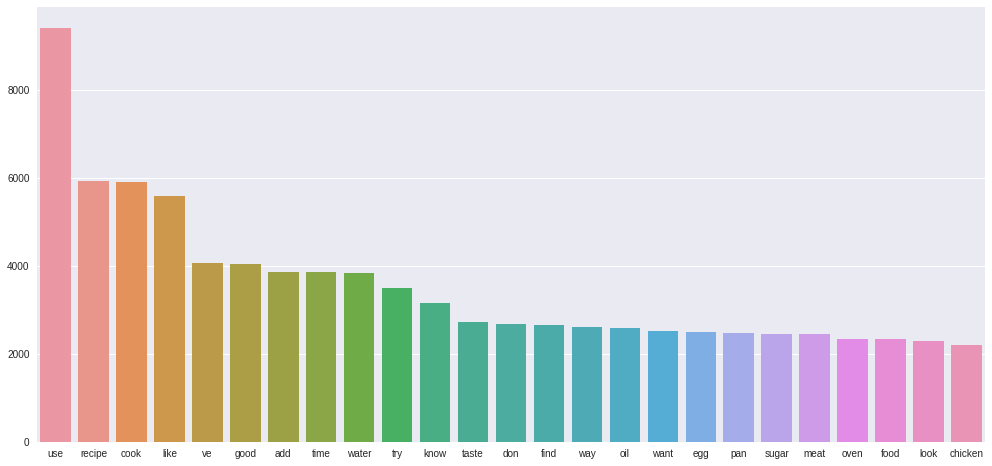

In [389]:
fig = plt.figure(figsize=(17,8))
sns.barplot(x=cook_word, y=cook_count)

In [380]:
crypto_content = stack_cleaned_df[stack_cleaned_df['topic']=='crypto']['content']
crypto_clean = " ".join([i for i in crypto_content]).split()
crypto_clean = Counter(crypto_clean)
crypto_word = [word[0] for word in crypto_clean.most_common(25)]
crypto_count = [word[1] for word in crypto_clean.most_common(25)]

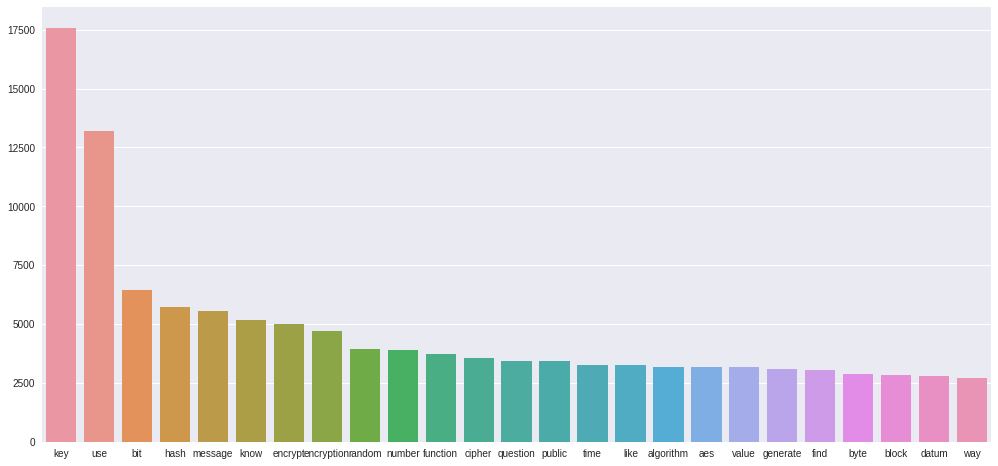

In [381]:
fig = plt.figure(figsize=(17,8))
sns.barplot(x=crypto_word, y=crypto_count)

In [390]:
diy_content = stack_cleaned_df[stack_cleaned_df['topic']=='diy']['content']
diy_clean = " ".join([i for i in diy_content]).split()
diy_clean = Counter(diy_clean)
diy_word = [word[0] for word in diy_clean.most_common(25)]
diy_count = [word[1] for word in diy_clean.most_common(25)]

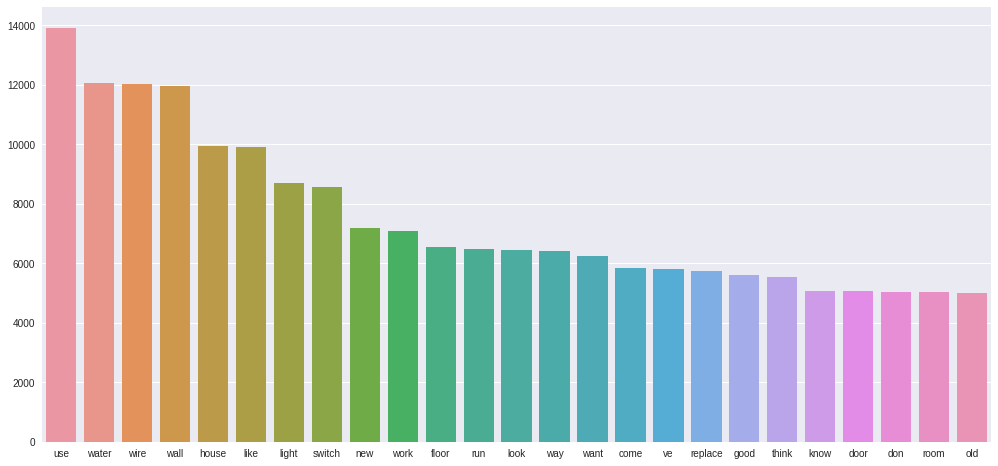

In [391]:
fig = plt.figure(figsize=(17,8))
sns.barplot(x=diy_word, y=diy_count)

In [392]:
travel_content = stack_cleaned_df[stack_cleaned_df['topic']=='travel']['content']
travel_clean = " ".join([i for i in travel_content]).split()
travel_clean = Counter(travel_clean)
travel_word = [word[0] for word in travel_clean.most_common(25)]
travel_count = [word[1] for word in travel_clean.most_common(25)]

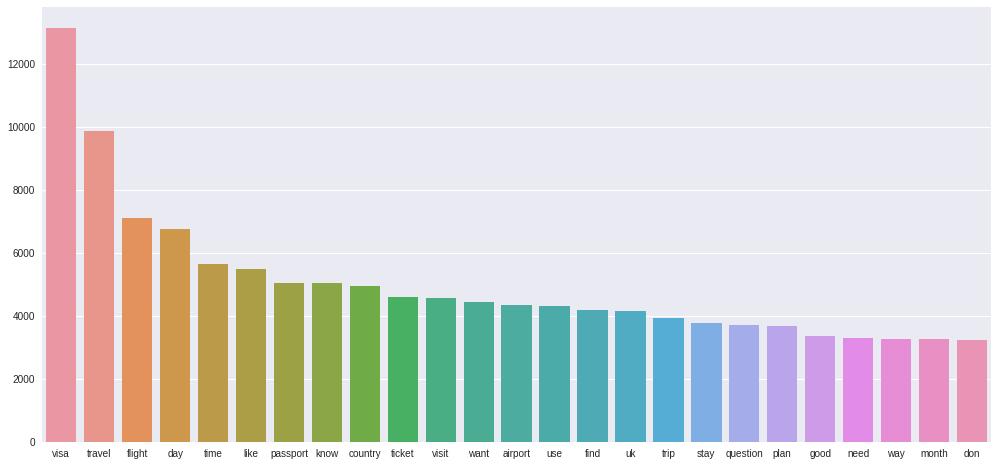

In [399]:
fig = plt.figure(figsize=(17,8))
sns.barplot(x=travel_word, y=travel_count)

In [401]:
#from autocorrect import spell
#have to look into selling correction in future

In [5]:
stack_cleaned_df['content'][3889]

'short dna sequence come middle gene tctaactgattagc agattgactaatcg sequence determine follow promoter locate left right sequence write sense strand strand amino acid encode gene fragment thing able come middle dna sequence ne choose frame stop codon'

In [6]:
tf= TfidfVectorizer(min_df=10)
X = tf.fit_transform(stack_cleaned_df['content'])

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [7]:
x = pd.DataFrame(X.toarray(), index= stack_cleaned_df.index, columns=tf.get_feature_names())


In [8]:
le = LabelEncoder()
y = stack_cleaned_df['topic']
y = le.fit_transform(y)
y = pd.Series(y)

In [9]:
print(type(x)), print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


(None, None)

In [10]:
x.head()

,aa,aaa,aac,aad,aadvantage,aav,ab,aba,abandon,abatement,...,zk,zn,zone,zoo,zoom,zucchini,zurich,zw,zygote,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x.as_matrix(), y, test_size= 0.3)

In [13]:
nb = MultinomialNB()
nb.fit(xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
print(nb.score(xtrain, ytrain)), print(nb.score(xtest, ytest))

0.9708538587848933
0.9658620689655173


(None, None)

In [17]:
lg = LogisticRegression()
lg.fit(xtrain, ytrain)
print(lg.score(xtrain, ytrain), lg.score(xtest, ytest))

0.9818062397372742
0.9709578544061302


(None, None)

### Creating a clean function for creating lists of list of sentences from 'content' coulmn. This will be used on Word2Vec, which accepts lists of list as input. 
PunktSentenceTokenizer tokenizes sentences using (.?!) as separater. I am converting everything to lower case, deleting '\n' character, then tokenizing the sentences and finally deleting punctuaiton marks.

In [20]:
from nltk.tokenize import PunktSentenceTokenizer 

In [21]:
tokenizer = PunktSentenceTokenizer()
def cleanup_for_word2vec(docs):
    sentences = []
    for doc in docs:
        doc = re.sub('&#39;','',doc).lower()
        doc = re.sub('[\n]', ' ', doc)
        doc = " ".join(doc.split()) 
#         doc = [word for word in doc.split() if word not in STOP_WORDS]
#         doc = " ".join(doc)
        doc = tokenizer.tokenize(doc)
        #text = [i.split() for i in text]
        doc = [re.sub("[#$%&\()*+-/:.,?!;<=>@[\\]^_`{|}~]", " ", sent) for sent in doc]
        doc = [sent.split() for sent in doc]
        sentences+=(doc)
    return sentences

In [34]:
cleaned_content_word2vec = cleanup_for_word2vec(stacke_df['content'])

In [282]:
# doc = stacke_df['content'][0]
# print(doc)
# doc = re.sub('&#39;','',doc).lower()
# doc = re.sub('[\n]', ' ', doc)
# #doc = " ".join(doc.split()) 

# doc = [word for word in doc.split() if word not in STOP_WORDS]
# doc = " ".join(doc)
# print(doc)
# #doc = tokenizer.tokenize(doc)
# doc = re.split("[\.?!;] ", doc)
# print(doc)
# doc = [re.sub("[#$%&\()*+-/:.,?!;<=>@[\\]^_`{|}~]", " ", sent) for sent in doc]
# #doc = [" ".join(sent.split()) for sent in doc]
# doc = [sent.split() for sent in doc]
# (doc)

In [275]:
cleaned_content_word2vec

[['in',
  'prokaryotic',
  'translation',
  'how',
  'critical',
  'for',
  'efficient',
  'translation',
  'is',
  'the',
  'location',
  'of',
  'the',
  'ribosome',
  'binding',
  'site',
  'relative',
  'to',
  'the',
  'start',
  'codon'],
 ['ideally',
  'it',
  'is',
  'supposed',
  'to',
  'be',
  '7b',
  'away',
  'from',
  'the',
  'start'],
 ['how',
  'about',
  'if',
  'it',
  'is',
  '9',
  'bases',
  'away',
  'or',
  'even',
  'more'],
 ['will', 'this', 'have', 'an', 'observable', 'effect', 'on', 'translation'],
 ['does',
  'anyone',
  'have',
  'any',
  'suggestions',
  'to',
  'prevent',
  'rnase',
  'contamination',
  'when',
  'working',
  'with',
  'rna'],
 ['i',
  'tend',
  'to',
  'have',
  'issues',
  'with',
  'degradation',
  'regardless',
  'of',
  'whether',
  'i',
  'use',
  'depc',
  'treated',
  'rnase',
  'free',
  'water',
  'and',
  'filtered',
  'pipette',
  'tips'],
 ['tortora',
  'writes',
  'in',
  'principles',
  'of',
  'anatomy',
  'and',
  'physi

In [279]:
len(cleaned_content_word2vec)

522164

### Pickling the cleaned lists of list of sentences for using it later on word2vec algorithm

In [35]:
import pickle  
word2vec_list = open('data/word2vec.pkl', 'wb') 
pickle.dump(cleaned_content_word2vec, word2vec_list)

In [36]:
word2vec_list = open('data/word2vec.pkl', 'rb')
cleanup_for_word2vec = pickle.load(word2vec_list)

In [37]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: six>=1.5.0 in /home/jovyan/.local/lib/python3.6/site-packages (from gensim)
Requirement already up-to-date: smart-open>=1.2.1 in /opt/conda/lib/python3.6/site-packages (from gensim)
Requirement already up-to-date: scipy>=0.18.1 in /opt/conda/lib/python3.6/site-packages (from gensim)
    100% |████████████████████████████████| 12.2MB 55kB/s eta 0:00:01   15% |█████                           | 1.9MB 3.1MB/s eta 0:00:04    68% |█████████████████████▊          | 8.3MB 4.4MB/s eta 0:00:01    91% |█████████████████████████████▎  | 11.1MB 2.1MB/s eta 0:00:01
Requirement already up-to-date: bz2file in /opt/conda/lib/python3.6/site-packages (from smart-open>=1.2.1->gensim)
Requirement already up-to-date: boto>=2.32 in /opt/conda/lib/python3.6/site-packages (from smart-open>=1.2.1->gensim)
    100% |████████████████████████████████| 133kB 2.7MB/s ta 0:00:01
Requirement already up-to-d

In [38]:
from gensim.models.word2vec import Word2Vec

In [39]:
wordvec_model = Word2Vec(cleaned_content_word2vec, iter=10, size=300, window=5, min_count=10, workers=4, sg=0)

In [40]:
print("%d unique words represented by 300 dimensional vectors" % (len(wordvec_model.wv.vocab)))

23879 unique words represented by 300 dimensional vectors


In [41]:
wordvec_model.wv.vocab

{'p': <gensim.models.keyedvectors.Vocab at 0x7f5c59247a58>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f5c5988c2e8>,
 'prokaryotic': <gensim.models.keyedvectors.Vocab at 0x7f5c0936a940>,
 'translation': <gensim.models.keyedvectors.Vocab at 0x7f5c0936a978>,
 'how': <gensim.models.keyedvectors.Vocab at 0x7f5c0936a9b0>,
 'critical': <gensim.models.keyedvectors.Vocab at 0x7f5c0936a7f0>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f5c0936aac8>,
 'efficient': <gensim.models.keyedvectors.Vocab at 0x7f5c0936abe0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f5c0936ac18>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f5c0936aa20>,
 'location': <gensim.models.keyedvectors.Vocab at 0x7f5c0936acf8>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f5c0936aba8>,
 'ribosome': <gensim.models.keyedvectors.Vocab at 0x7f5c0936aef0>,
 'binding': <gensim.models.keyedvectors.Vocab at 0x7f5c0936ae10>,
 'site': <gensim.models.keyedvectors.Vocab at 0x7f5c0936a898>,
 'relative': <gensim.models.keyed

In [305]:
wordvec_model['process']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.03139331, -0.06624227,  0.98912853,  0.28257632, -0.22260252,
        1.04019201, -0.67698324,  0.48923421, -0.9510771 , -0.04696844,
       -1.19060874, -0.25399011,  0.26795605,  0.94836307, -1.11321759,
        0.46254134, -1.01055729, -0.61707669,  0.62005365,  0.99494934,
        0.51716697, -0.47553182,  0.3173942 ,  1.0530287 ,  0.54746228,
        0.17654598, -1.23150122, -1.08027816, -0.26619598, -1.54601669,
        0.40136543,  0.14330103, -1.13344586,  0.9200238 , -0.22125024,
        1.05229628,  0.8290211 ,  0.94682813,  0.1732339 , -0.01452123,
       -0.9070735 ,  0.0447567 , -0.563344  , -0.13162753,  0.610897  ,
        0.54209822,  1.0852921 ,  0.26425242, -0.34888196,  0.61939198,
       -1.31862438, -0.15286514, -0.65189517, -0.31240737,  0.2579729 ,
        0.44497567,  0.44445264,  0.44955376, -0.45778406,  0.09796245,
        0.38191903,  1.2608397 , -0.14261377,  1.01404679, -0.41051811,
        0.7660051 , -0.18160731, -0.58024162, -0.08346263, -0.70

In [420]:
#len of each vector in word2Vec model
len(wordvec_model.wv.vectors[0])

300

#### Printing the most common words in word2Vec. The word vectors are also arranged within the wv object with indexes – the lowest index (i.e. 0) represents the most common word, the highest (i.e. the length of the vocabulary minus 1) the least common word. 

In [42]:
print(wordvec_model.wv.index2word[0], wordvec_model.wv.index2word[1], wordvec_model.wv.index2word[2])

p the a


In [43]:
print(wordvec_model.wv.index2word[len(wordvec_model.wv.vocab) -1], \
      wordvec_model.wv.index2word[len(wordvec_model.wv.vocab) -2], \
      wordvec_model.wv.index2word[len(wordvec_model.wv.vocab) -3])

busch crittall 32a


### Now that we have trained our word2Vec model, we need to create vectors for the words in our training set.
we have to represent the text sample in the dimensionality of word2vec (in this case 300). One way of doing that is to average the word vectors for each word in a text example.

Each content is represented by a single real-value dense vector based on the word embeddings associated with each word. This is done by selecting words from the plot, based on their part-of-speech (PoS)-tags, and then summing their word embeddings and averaging them into a single vector. 

In [44]:
def create_average_vec(doc):
    average = np.zeros((text_dim,), dtype='float32')
    num_words = 0.
    for word in doc.split():
        if word in wordvec_model.wv.vocab:
            average = np.add(average, wordvec_model[word])
            num_words += 1.
    if num_words != 0.:
        average = np.divide(average, num_words)
    return average

In [45]:
average = np.zeros((300), dtype='float32')

In [46]:
doc = 'process afford mean ascertain dimension dungeon make circuit return point set aware fact perfectly uniform wall'
doc2= 'chemical composition of biology'

In [47]:
class AverageEmbeddingVectorizer():
    
    def __init__(self, word2vec_model):
        self.model = word2vec_model
        self.size = len(word2vec_model.wv.vectors[0])
        self.count= 0 # for keeping count of number of words from document found inside word2vec model
        
    def fit(self, X, y):
        pass
    
    def transform(self, text):
        self.count=0
        average = np.zeros(self.size)
        for word in text.split():
            if word in self.model.wv.vocab:
                average = np.add(average, self.model[word])
                self.count += 1
        if self.count != 0:
            average = np.divide(average,self.count)
        return average

In [48]:
avvec = AverageEmbeddingVectorizer(wordvec_model)

In [423]:
avvec.transform(doc2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


array([ 0.38381771,  0.38956606,  0.47156756, -0.49508695,  0.44199402,
        0.06904487,  0.05489494, -0.50977593,  0.42302875,  0.08361353,
       -0.23619248, -0.07557812,  0.44396158,  0.16856769,  0.30898402,
       -0.08047122, -0.28189032, -0.21028723,  0.75778115, -0.02035433,
        0.07053802, -0.08977168,  0.23919301, -0.32864637, -0.28973918,
        0.03278573, -0.0933993 , -0.46940752, -0.14152543,  0.28928971,
        0.18376741,  0.03622131, -0.26492797,  0.30892027, -0.05399724,
        0.26585072, -0.1543277 , -0.00137758, -0.12970862, -0.01134051,
       -0.7006379 ,  0.19142346,  0.3693368 ,  0.13691175,  0.50073369,
       -0.13818255,  0.5882968 , -0.17339043, -0.12041892, -0.26524294,
       -0.35347578, -0.54638659,  0.32725069,  0.5572456 ,  0.14694097,
       -0.32619982,  0.264217  , -0.35822108,  0.40074387,  0.54299716,
       -0.38868402,  0.1134271 , -0.40062098, -0.4891395 , -0.61867277,
        0.38644887, -0.85948164, -0.22944918,  0.27339556, -0.09

In [424]:
avvec.count

4

### I am setting the 'content' and 'topic' as predictor and target. I am splitting them as training and test set.

In [49]:
x = stack_cleaned_df['content']
y = stack_cleaned_df['topic']

In [50]:
#creating an initial empty matrix of the size of the training set with word@vec model shape
trained_wordvec = np.zeros((x.shape[0], len(wordvec_model.wv.vectors[0])), dtype= 'float64')
trained_wordvec.shape

(87000, 300)

In [51]:
#instantiating embedding class and for each training dataset transforming the class instance for embedding text
avvec = AverageEmbeddingVectorizer(wordvec_model)
for i in range(xtrain.shape[0]):
    trained_wordvec[i] = avvec.transform(x.iloc[i])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [445]:
# from sklearn.preprocessing import label_binarize
# lb = label_binarize(y, classes = ['cooking','biology','diy','robotic','travel','crypto'])

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(trained_wordvec, y, test_size = 0.3)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60900, 300), (60900,), (26100, 300), (26100,))

In [ ]:
def train_test_svm(x_data, y_data, genres):

    stratified_split = StratifiedShuffleSplit(n_splits=2, test_size=0.33)
    for train_index, test_index in stratified_split.split(x_data, y_data):
        x_train, x_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

    """
    print "LinearSVC"
    pipeline = Pipeline([
        ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
    ])
    parameters = {
        "clf__estimator__C": [0.01, 0.1, 1],
        "clf__estimator__class_weight": ['balanced', None],
    }
    grid_search(x_train, y_train, x_test, y_test, genres, parameters, pipeline)
    print "LogisticRegression"
    pipeline = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
    ])
    parameters = {
        "clf__estimator__C": [0.01, 0.1, 1],
        "clf__estimator__class_weight": ['balanced', None],
    }
    grid_search(x_train, y_train, x_test, y_test, genres, parameters, pipeline)
    """

    print "LinearSVC"
    pipeline = Pipeline([
        ('clf', OneVsRestClassifier(SVC(), n_jobs=1)),
    ])
    """
    parameters = {
        "clf__estimator__C": [0.01, 0.1, 1],
        "clf__estimator__class_weight": ['balanced', None],
    }
    """
    parameters = [

        {'clf__estimator__kernel': ['rbf'],
         'clf__estimator__gamma': [1e-3, 1e-4],
         'clf__estimator__C': [1, 10]
        },

        {'clf__estimator__kernel': ['poly'],
         'clf__estimator__C': [1, 10]
        }
         ]

    grid_search(x_train, y_train, x_test, y_test, genres, parameters, pipeline)


def grid_search(train_x, train_y, test_x, test_y, genres, parameters, pipeline):
    grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=10)
    grid_search_tune.fit(train_x, train_y)

    print
    print("Best parameters set:")
    print grid_search_tune.best_estimator_.steps
    print

    # measuring performance on test set
    print "Applying best classifier on test data:"
    best_clf = grid_search_tune.best_estimator_
    predictions = best_clf.predict(test_x)

    print classification_report(test_y, predictions, target_names=genres)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [60]:
pipe = Pipeline([('clf', OneVsRestClassifier(ExtraTreeClassifier(), n_jobs=-1))])
parameters = {
        "clf__estimator__C": [0.01],
        "clf__estimator__class_weight": ['balanced', None],
    }

In [62]:
pipe.fit(xtest, ytest)

Pipeline(steps=[('clf', OneVsRestClassifier(estimator=ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          random_state=None, splitter='random'),
          n_jobs=-1))])

In [63]:
pipe.score(xtest, ytest)

0.9977777777777778

In [64]:
pipe.score(xtrain, ytrain)

0.8263218390804598